# Recurrent Neural Networks

 A _Recurrent Neural Network (RNN)_ is a class of neural networks where the connection between nodes forms a directed graph along a sequence. This allows it to show temporal dynamic behavior for a time sequence. RNNs use their internal state (memory) to process sequences of inputs, this makes RNNs applicable to problems which deal with sequence information.
 
Examples of sequences are:
* Handwriting
* Speach
* Time Series Data (e.g., sales data)
* Sentences
* Audio
* Car Trajectories
* Music
 

## Theory
To understand the RNNs let's look at the structure of a neuron in a feed forward network and see the difference with the neuron structure in an RNN.

### Normal Neuron in a Feed Forward Networks

A normal neuron in a feed forward network looks like the following:

<img src='images\neuron.png'/>

Therefore, a normal neuron in a feed forward network, takes an input or some inputs, aggregates them and produces the output using the activation funtion.

### Recurrent Neuron

Instead a recurrent neuron looks like the following:

<img src='images\rnn_neuron.png'/>

Where it sends the outout back to itself. If we unroll this functionality through _time_, we will have a structure as follows:

<img src='images\time_rnn_neuron.png'/>

where the output of a neuron at time $t-1$ will be the input of the neuron at time $t$. It should be noted that each neuron in this structure receives both the input from a previous time instance and the input from the current time instance.

#### Memory Cells
The neurons that are a function of inputs from previous time instances are known as _memory cells_.

#### Layers of Recurrent Neurons
What we have seen until now was one single recurrent neuron. We can also create entire layers of Recurrent Neurons. An example of an RNN layer with 3 neurons will look like this:

<img src='images\rnn_layer.png'/>

where $x$ is the input which will pass through the neurons to create output $y$. Then output $y$ will be sent back as the input of the neurons. To have a better understanding of what happens in different time instances, we can enroll the entire layer through time as follows:

<img src='images\time_rnn_layer.png'/>

Here the output from $t=0$ is passed together with the input in time $t+1$, and this continues through time. Since the output of time $t+n$ is a function of all previous time instances, it can be considered to have some form of memory as we are actually passing historical information to it.

#### Flexibility of RNNs for Inputs and Outputs

RNNs are flexible in their inputs and outputs, for both sequences and single vector values. Here are some examples:

##### Sequence to Sequence

We can pass a sequence input to a sequence output. An example is to consider a sequence of sales information over time as input, while we need this sequence to be shifted one step in the future as the output.

<img src='images\sequence_to_sequence.png'/>

##### Sequence to Vector

Another example is to pass in a sequence input and request the vector output. A usecase of using RNNs for this sort of inputs and outputs is the sentiment score, were we pass in a sequence of words, and we expect a vector indicating whether the sequence indicated a positive or a negative sentiment.

<img src='images\sequence_to_vector.png'/>

##### Vector to Sequence

Another case is to have a vector input and get a sequence output. In this case the rest of the inputs will be set to zero. Example of this case can be creating captions for photos.

<img src='images\vector_to_sequence.png'/>

## Manual Creation of the RNNs

Here we are going to create a Recurrent Neural Network Manually by the use of Tensorflow. Later we will explore the RNN API in Tensorflow.

The example that will be shown is a 3 neuron RNN layer with Tensorflow shown below:

<img src='images\rnn_layer.png'/>

As shown in the photo, we will need two set of weight here, one is $W_x$ that is related to the set of inputs, and the other is $W_y$ which is required for the output which comes back to the neuron.

We will start by running the RNN for 2 batches of data, $t=0$ and $t=1$.

<img src='images\3_neuron_rnn.png'/>

The main purpose is to focus on the input format of the data. The formatting of the input data is as follows:

<img src='images\input_format.png'/>

Here words are shown for better understanding, however, for development we will use numerical data. We have two samples of data which are sequences of words (sentences) with 5 timestampts. Considering the example of having 5 batches (here called words_in_dataset), and batch size of 2, each batch will contain two samples. The data is feeded in based on the time stamp and not based on the batches.

In [1]:
# Importing required libraries
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Creating the constants

# number of inputs for each example (inputs are only for two time stamps)
num_inputs = 2

# number of neurons
num_neurons = 3

In [3]:
# Creating the placeholders

# We need a placeholder for each timestamp
# input at t=0
x0 = tf.placeholder(tf.float32, [None, num_inputs])
# input at t=1
x1 = tf.placeholder(tf.float32, [None, num_inputs])

In [4]:
# Creating the variables

# Weights of inputs
Wx = tf.Variable(tf.random_normal(shape = [num_inputs, num_neurons]))

# Weights of outputs 
Wy = tf.Variable(tf.random_normal(shape = [num_neurons, num_neurons]))

# the bias
b = tf.Variable(tf.zeros([1, num_neurons]))

In [6]:
# Creating graphs (set of operations)

# output at t=0 using hyperbolic tangent as the activation function
y0 = tf.tanh(tf.matmul(x0, Wx) + b)

# output at t=1, including the output from previous time step
y1 = tf.tanh(tf.matmul(y0, Wy) + tf.matmul(x1, Wx) + b)

In [7]:
# Initialize the variables
init = tf.global_variables_initializer()

In [8]:
# Create data

# All the data at t=0
x0_batch = np.array([ [0,1] , [2,3] , [4,5] ])

# All data at t=1
x1_batch = np.array([ [100,101] , [102,103] , [104,105] ])

In [10]:
# Run the session
with tf.Session() as sess:
    
    # Initialize the variables
    sess.run(init)
    
    # Output values
    y0_output_vals, y1_output_vals = sess.run([y0, y1], feed_dict = {x0: x0_batch, x1: x1_batch})

In [11]:
# The results of output y0
y0_output_vals

array([[ 0.620765  ,  0.26799986, -0.56366825],
       [ 0.9999926 ,  0.9994794 , -0.9987327 ],
       [ 1.        ,  0.99999976, -0.99999726]], dtype=float32)

In [13]:
# The results of output y1
y1_output_vals

array([[ 1.,  1., -1.],
       [ 1.,  1., -1.],
       [ 1.,  1., -1.]], dtype=float32)

It should be considered that this manual approach doesn't scale for larger networks, and it was only shown for the sake of better understanding the RNNs.

## The Problem of Vanishing Gradients

When it comes to analyzing the larger time series datasets in RNNs there are some challenges to be considered. One of the key issues is the problem of vanishing gradients.

Recalling that backpropagation goes backwards from the output to the input layer, propagating the error gradient. For deeper networds, issues can arise from vanishing and exploding gradients during backpropagation. 

As you go back to the "lower" layers (closer to the inputs), gradients often get smaller, eventually causing weights to never change at these lower levels.

The opposite can also occur, gradients explode on the way back, causing issues for activation functions who use derivatives that has taken a larger values.

### Why Does this Problem Happen?

This problem happens in relation to the activation function choice. The traditional activation functions such as sigmoid, that is shown below, have a curvature that for very small values and for very large values have a slope (gradient) that gets close to zero.

As the backpropagation computes the gradients using the chain rule, for calculating the gradients of lower layers, small gradients of upper layers are multiplied, and this causes the gradients to get smaller exponentially with relation to the number of layers in the network. As the concequence, the front layers get trained very slowly because of the smaller and smaller gradients in every iteration.

<img src='images\vanishing_gradient_act1.png'/>

### What Are the Solutions?

#### Using Different Activation Functions

One solution is to use a different activation function. _Rectified Linear Unit (ReLu)_ is an activation function that does not saturate the positive values. However, the issue with this activation function is that for negative numbers it is always going to result in zero.


In the following you can view ReLu:

<img src='images\ReLU.png'/>

To resolve the issue of ReLu with negetive numbers, there is a modified version of ReLu that is called _Leaky ReLu_:

<img src='images\leaky_ReLu.png'/>

As shown above, Leaky ReLu has a negative slope for negative numbers.

There are other activation functions such as _Exponential Linear Unit (ELU)_ which also attempts to solve the problems related to the vanishing gradients:

<img src='images\elu.png'/>

#### Using Batch Normalization
Another solution is to use batch normalization, where the model will normalize each batch using the batch mean and standard deviation.

#### Gradient Clipping
In Gradient Clipping, the gradients are cut off before reaching a predetermined limit (e.g., cut off gradients to be between -1 and 1).


### Vanishing Gradients in RNNs

RNNs for time series present their own challenges with gradients. To resolve these issues there are specialized neuron units.

The solutions that are presented until now, also apply to RNNs. However, because of the length of time series input, these could slow down the training.

A possible solution would be to shorten the time steps used for prediction. But this makes the model worse at predicting longer trends.

Another issue RNNs face is that after a while the networks will begin to forget the first inputs, as information is lost at each step going through the RNN. Hence we need some sorf of "long-term memory" for the RNN.

#### Long Short-Term Memory (LSTM) Cells

LSTM cells was created in 1997 to help address the mentioned issues in RNNs.

A typical RNN has the following structure, where output of previous time step ($h_{t-1}$) is feeded at the next time step $t$ together with its input:
<img src='images\typical_rnn.png'/>

In the following you can see the entire LSTM cell:
<img src='images\lstm_cell.png'/>

Here, we have 3 inputs to the cell. $x_t$ is the actual input, $h_{t-1}$ is the output of the previous time step, and $c_{t-1}$ is the _cell state_ from the previous time step. The outputs of the LSTM cell are the $h_{t}$ (the current calculated output) and the $c_{t} that is the current cell state$.

Let's see a step by step explanation of what happens in an LSTM cell:

* 1st step: __Forget Gate Layer__($f_t$), where we decide what information we are going to forget or discard from the cell state. Here, we pass in the $x_t$ and $h_{t-1}$, and after a linear transformation with weights $W_f$ we apply the sigmoid function that produces $\{0,1\}$ as a result. $0$ indicates that we want to discard the information and $1$ indicates that we want to keep the information.

<img src='images\lstm_step1.png'/>

* 2nd step: Here we want to decide which information to store in the cell state $C_t$. In this case, the first part is a sigmoid layer (__Input Gate Layer__ $i_t$) and the second part is a __Hyperbolic Tangent (tanh) Layer__ ($\tilde{C}_t$).

    * The Input Gate Layer, gets the $x_t$ and $h_{t-1}$ as inputs, applies a linear transformation using weights $W_i$ and passes the results to a sigmoid function that output values between $0$ and $1$.
    * The tanh layer does the linear transformation on $x_t$ and $h_{t-1}$ using weights $W_c$, and then applies a tanh function. This process will create a vector of _new candidate values_, these are the candidate values that could be added to the state.
    
<img src='images\lstm_step2.png'/>

* 3rd step: Here we want to combine the $f_t$ (old information we want to forget), $i_t$ and $\tilde{C}_t$ (new information we want to store) to update the old cell state $C_{t-1}$ and set the new cell state $C_t$.

<img src='images\lstm_step3.png'/>

* Final step: in this step we want to calculate the output $h_t$. This output is going to be based on the cell state, however, it is a filtered version. To do this (to calculate $o_t$) we do a linear transformation of $x_t$ and $h_{t-1}$ based on weights $W_0$ and pass that in a sigmoid function. To do the filtering, we apply a tanh function to the cell states $C_t$ that resuls in values between $-1$ and $1$, and multiply it with the $o_t$. In this way, we only output the parts that we decide to.

<img src='images\lstm_step4.png'/>

#### An LSTM Cell with "Peepholes"

There is another variance on the LSTM cell called the _peephole_ variance. This variance of LSTM adds peepholes to all the gates. In this way, it allows, $f_t$, $i_t$ and $o_t$ to be able to see the previous cell state.

<img src='images\lstm_peepholes.png'/>

#### Gated Recurrent Unit (GRU)

Another variation of the LSTM cell is the _Gated Recurrent Unit (GRU)_. This approach has been proposed recently, around 2014. This approach simplifies LSTMs by combining the forget and input gates into a single gate that is called the __Update Gate__. It also merges the cell state and the hidden state (the output).

This approach simplifies the LSTM model and because of that is growing very popular over the past few years.

<img src='images\lstm_peepholes.png'/>

There are other variations that have been developed over time, e.g., depth gated recurrent neural networks that has been introduced in 2015.


## TensorFlow's API for RNNs

TensorFlow comes with these neuron models built into a nice API. Here we are going to see the built-in tf.nn function API to solve sequence problems!

As an example we will use time series as $sin(x)$, where we feed a part of $sin(x)$ and we expect the RNN to shift the values one step in time and predict the next value in the serie.


* We'll first create a simple class to generate $sin(x)$ and also grab random batches of $sin(x)$. 

* Then the trained model will be given a time series and attemot to predict a time series shifted one time step ahead.

Later, we will use the same model to generate much longer time series given seed series.


In [14]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
# The class to create data and sends back the batches 
class TimeSeriesData():
    
    def __init__(self, num_points, xmin, xmax):
        
        self.xmin = xmin
        self.xmax = xmax
        self.num_points = num_points
        
        # The resolution
        self.resolution = (xmax - xmin)/num_points
        
        # Creating linearly spaced numbers
        self.x_data = np.linspace(xmin, xmax, num_points)
        
        # The sin of x_data
        self.y_true = np.sin(self.x_data)
        
    # To compare the data that we don't have    
    def ret_true(self, x_series):
        return np.sin(x_series)
    
    # To generate batches of data
    def next_batch(self, batch_size, steps, return_batch_ts = False):
        
        # Grab a random starting point for each batch of data
        random_start = np.random.rand(batch_size, 1) # random values in a given shape
        
        # Convert to be on time series
        ts_start = random_start * (self.xmax - self.xmin - (steps * self.resolution))
        
        # Create batch time series on the x axis
        batch_ts = ts_start + np.arange(0.0, steps+1) * self.resolution
        
        # Create the Y data for the time series x axis from previous step
        y_batch = np.sin(batch_ts)
        
        # Formatting for RNN
        if return_batch_ts:
            # if we need the x axis batch
            return y_batch[:, :-1].reshape(-1, steps, 1), y_batch[:,1:].reshape(-1, steps, 1), batch_ts
        else:
            # Return the batch and the shifted batch by one step in future
            return y_batch[:, :-1].reshape(-1, steps, 1), y_batch[:,1:].reshape(-1, steps, 1)

In [16]:
# Lets create 250 points between 0 and 10
ts_data = TimeSeriesData(250, 0, 10)

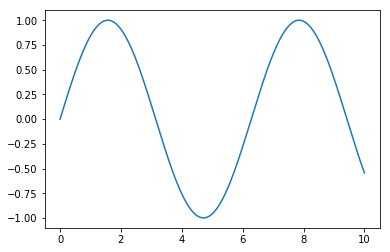

In [17]:
# Plotting the x_data and y_data which will result in the sin function
plt.plot(ts_data.x_data, ts_data.y_true)

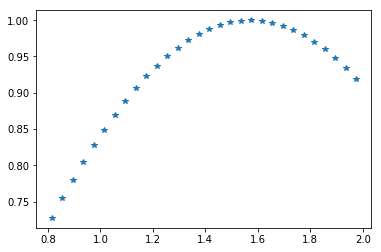

In [21]:
# defining number of steps in batch
num_time_steps = 30

# Creating one batch with 30 time steps
y1, y2, ts = ts_data.next_batch(1, num_time_steps, True)

# We need to flatten the batch in order to plot it
# Notice that the y1 has all the points in the series except the last one
# and y2 is shifted over 1 time step, so it does not consider the first point
plt.plot(ts.flatten()[1:], y2.flatten(), '*')

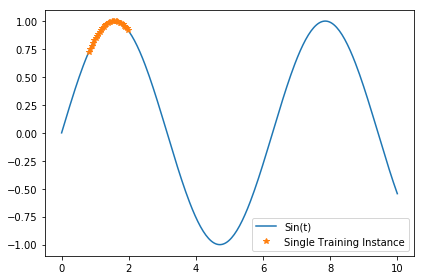

In [22]:
# Visualizing the created batch on top of the data
plt.plot(ts_data.x_data, ts_data.y_true, label = 'Sin(t)')
plt.plot(ts.flatten()[1:], y2.flatten(), '*', label = 'Single Training Instance')

plt.legend()
plt.tight_layout()

In [23]:
# Training data
train_inst = np.linspace(5, 5 + ts_data.resolution * (num_time_steps +1) , num_time_steps +1)
train_inst

array([5.        , 5.04133333, 5.08266667, 5.124     , 5.16533333,
       5.20666667, 5.248     , 5.28933333, 5.33066667, 5.372     ,
       5.41333333, 5.45466667, 5.496     , 5.53733333, 5.57866667,
       5.62      , 5.66133333, 5.70266667, 5.744     , 5.78533333,
       5.82666667, 5.868     , 5.90933333, 5.95066667, 5.992     ,
       6.03333333, 6.07466667, 6.116     , 6.15733333, 6.19866667,
       6.24      ])

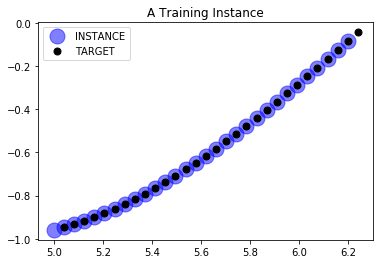

In [25]:
plt.title('A Training Instance')

# PLotting the training data (without the last instance)
plt.plot(train_inst[:-1], ts_data.ret_true(train_inst[:-1]), 'bo', markersize = 15, alpha = 0.5, label = 'INSTANCE')

# Plotting the target values at one time step in the future (without the first instance)
plt.plot(train_inst[1:], ts_data.ret_true(train_inst[1:]), 'ko', markersize = 7, label = 'TARGET')

plt.legend()

What we want to achieve it to predict the black points shown above with our model, given the blue dots.